# Business Understanding

## Project Domain

Proyek **Mobile Price Classification** untuk membangun sistem yang dapat memprediksi kategori harga ponsel berdasarkan kategori low, medium, high, very high berdasarkan spesifikasi hardwarenya. Sistem ini membantu untuk menganalisis data seperti RAM, ukuran layar, kapasitas baterai dan lainnya
Untuk model menggunakan **Arificial Neural Network atau ANN** sistem ini dapat dapat memasukkan spesifikasi ponsel dan prediksi kategori harga yang dapat berguna untuk; membantu konsumen membandingkan ponsel, mendukung strategi pemasaran produsen

## Problem Statements

Dengan semakin banyak merek dan tipe ponsel yang beredar di pasar yang membuat para konsumen dan pelaku industri sering kali mengalami kesulitan dalam mengklasifikasikan ponsel berdasarkan tingkat harga hanya dari spesifikasi teknisnya.
Klasifikasi manual berdasarkan spesifikasi sangat tidak efisien dan rawan kesalahan. oleh karena itu, diperlukan sebuah sistme berbasis machine learning yang mampu memprediksi kategori harga ponsel secara otomatis dan akurat berdasarka data spesifikasi

## Goals

1.   Membangun sistem prediksi kategori harga ponsel dengan berbasis machine learning yang akurat dan efisien
2.   mengolah data spesifikasi teknis ponsel untuk digunakan ssebagai dasar klasifikasi harga
3. menyederhanakan proses pengelompokkan produk ponsel bagi konsumen dan pelaku industri
4. Meningkatkan pemahaman pengguna terhadap nilai ponsel berdasarkan fitur - fiturnya tanpa harus melihat harga pasar


## Solution Statements

Untuk mengatasi permasalahan dalam mengklasifikasikan ponsel berdasarkan harga secara manual, solusi yang ditawarkan adalah membangun sistem prediksi berbasis machine learning yang mampu mengkategorikan harga ponsel ke dalam kelas tertentu (low, medium, high, very high) berdasarkan data spesifikasinya.  proses klasifikasi ponsel menjadi lebih cepat, efisien, dan akurat, serta dapat membantu pengguna maupun pelaku industri teknologi dalam pengambilan keputusan.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aisyahsyifa2","key":"52fb0a7952d27291579c9c9b6b52815e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification --force

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 206MB/s]


In [4]:
!mkdir mobile-price-classification
!unzip mobile-price-classification.zip -d mobile-price-classification
!ls mobile-price-classification

Archive:  mobile-price-classification.zip
  inflating: mobile-price-classification/test.csv  
  inflating: mobile-price-classification/train.csv  
test.csv  train.csv


## Import Library yang dibutuhkan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import joblib

## Exploratory Data Analysis

In [7]:
df = pd.read_csv("mobile-price-classification/train.csv") # Specify the correct path to the CSV file

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<ipython-input-11-0cf3b2c67cd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='Set2')


Text(0.5, 1.0, 'Distribusi Kelas Harga')

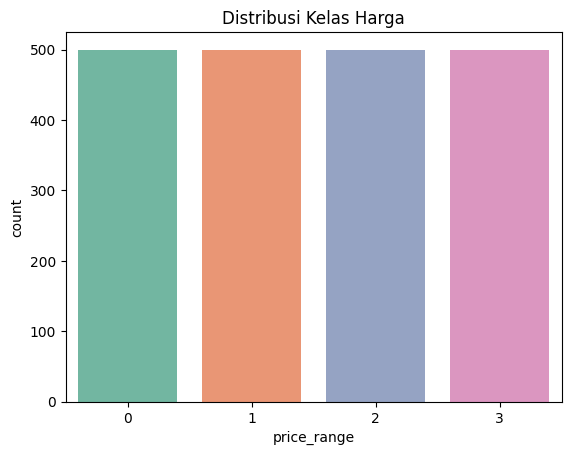

In [11]:
# Distribusi harga
sns.countplot(x='price_range', data=df, palette='Set2')
plt.title("Distribusi Kelas Harga")

<Axes: >

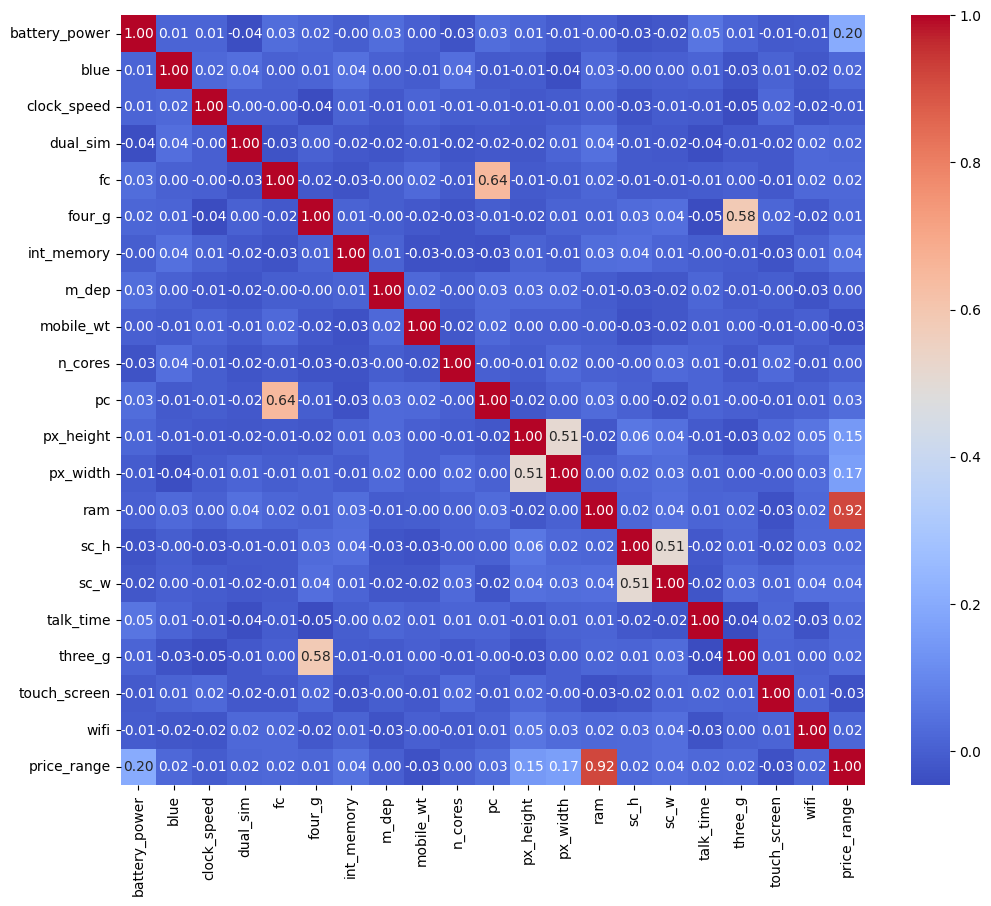

In [12]:
# Korelasi antar fitur
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

<ipython-input-14-164e17ded1b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')


<Axes: xlabel='price_range', ylabel='ram'>

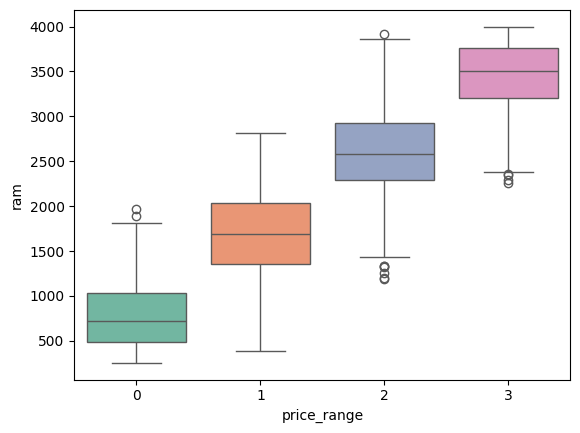

In [14]:
# Pengaruh RAM terhadap harga
sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')

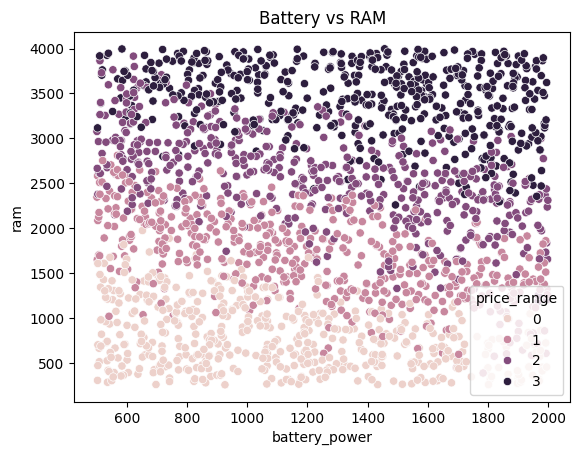

In [ ]:
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)
plt.title("Battery vs RAM")
plt.show()

<ipython-input-15-b2e96dfaa183>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_range', y='px_height', data=df, palette='Set2')


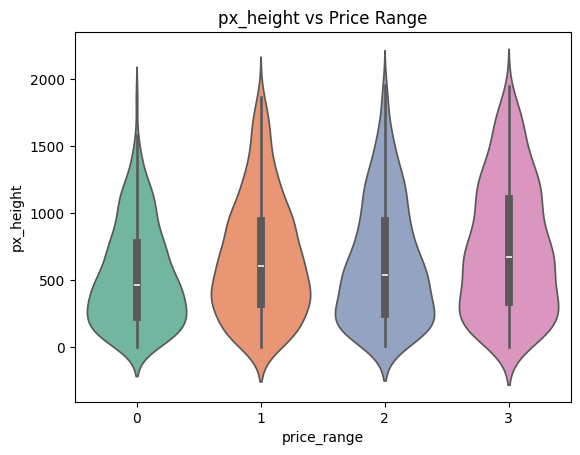

In [15]:
sns.violinplot(x='price_range', y='px_height', data=df, palette='Set2')
plt.title("px_height vs Price Range")
plt.show()

# Data Preparation

In [17]:
# Cek missing value
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [18]:
# Pisahkan fitur dan label
X = df.drop("price_range", axis=1)
y = df["price_range"]

In [19]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Simpan scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [21]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [24]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3039 - loss: 1.3874 - val_accuracy: 0.3750 - val_loss: 1.2899
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 1.1898 - val_accuracy: 0.5063 - val_loss: 1.1283
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6337 - loss: 1.0010 - val_accuracy: 0.6031 - val_loss: 0.9398
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.7988 - val_accuracy: 0.6812 - val_loss: 0.7827
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.6384 - val_accuracy: 0.7375 - val_loss: 0.6534
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.5426 - val_accuracy: 0.7969 - val_loss: 0.5525
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.4342 - val_accuracy: 0.8469 - val_loss: 0.4771
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9209 - loss: 0.3567 - val_accuracy: 0.8687 - val_loss:

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [27]:
# Simpan model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpqbdqoo_j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132473955890000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132475623952592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955891536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955890960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955889424: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Evaluation

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - loss: 0.1589 
Test Accuracy: 92.50%


In [31]:
y_pred = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[101   4   0   0]
 [  2  86   3   0]
 [  0   8  78   6]
 [  0   0   7 105]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.88      0.95      0.91        91
           2       0.89      0.85      0.87        92
           3       0.95      0.94      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



# Deployment

## Model Simulation

In [33]:
# Contoh data input (harus sesuai urutan fitur)
dummy_input = np.array([[842, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2549, 0, 0, 0, 0, 0, 0, 20, 756, 188]])

In [34]:
# Load scaler dan transform
scaler = joblib.load("scaler.pkl")
scaled_input = scaler.transform(dummy_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [36]:
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], scaled_input.astype(np.float32))
interpreter.invoke()

In [37]:
# Get output
output = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output)
print("Predicted price class:", predicted_class)

Predicted price class: 1


## Save Model

In [38]:
# Simpan model keras ke .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmptznqm5_b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132473955890000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132475623952592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955891536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955890960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132473955889424: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_mobile_price.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp_qo8p8o_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136104261880144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136104261879760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136102572406928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136102572408464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136102572405200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136102572405392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136105435794512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136105445866192: TensorSpec(shape=(), dtype=tf.resource, name=None)
